<a href="https://colab.research.google.com/github/Gonzal22/Actividad-6-/blob/main/regresion_nolineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [209]:
df = pd.read_csv('cuentas_credicel.csv', encoding='latin-1')
df.head()

<ipython-input-209-9bfc5b1acc19>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('cuentas_credicel.csv', encoding='latin-1')


,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,porc_eng,limite_credito,semana_actual,cp_cliente,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,3,HDNAWQ3A,30,12/11/21 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,40.02,5000,26,NaN,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,4,M418YNR4,33,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,35.01,6000,13,NaN,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,5,SZ7V3NZT,37,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,0,74,NaN,58.0,TANTOYUCA,VER.,0,0,0
3,6,9I08UIQZ,38,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,25.01,7000,13,NaN,42.0,AMXTLAN PUE,NaN,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,7,JMF4LKYU,44,13/11/21 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,25.01,7000,74,NaN,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [211]:
df.isnull().sum()

folio                    0
tag                      0
folio_solicitud          0
fecha                    0
marca                    0
modelo                   0
plazo                    0
precio                   0
enganche                 0
descuento                0
semana                   0
monto_financiado         0
costo_total              0
monto_accesorios         0
agente_venta             0
dis_venta                0
status                   0
fraude                   0
empresa                 13
inversion                0
pagos_realizados         0
reautorizacion           0
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         3314
puntos                   0
riesgo                   0
score_buro               0
razones_buro          7340
porc_eng                 0
limite_credito           0
semana_actual            0
cp_cliente            7243
edad_cliente             9
cd_cliente               0
edo_cliente              8
cd_venta                 0
e

In [212]:
df=df.fillna(method="bfill")
df=df.fillna(method="ffill")
df.isnull().sum()

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
pagos_realizados      0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
puntos                0
riesgo                0
score_buro            0
razones_buro          0
porc_eng              0
limite_credito        0
semana_actual         0
cp_cliente            0
edad_cliente          0
cd_cliente            0
edo_cliente           0
cd_venta              0
edo_venta             0
curp                  0
dtype: int64

In [213]:
df['limite_credito'] = df['limite_credito'].replace('SD', 0).astype(float)

In [214]:
eliminado = df.select_dtypes(include=['object']).columns
df = df.drop(columns=eliminado)

In [215]:
if df.info() != "object":
  print()
  print("No hay mas valores de object")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   folio             22735 non-null  int64  
 1   folio_solicitud   22735 non-null  int64  
 2   precio            22735 non-null  float64
 3   enganche          22735 non-null  float64
 4   descuento         22735 non-null  float64
 5   semana            22735 non-null  int64  
 6   monto_financiado  22735 non-null  float64
 7   costo_total       22735 non-null  int64  
 8   monto_accesorios  22735 non-null  float64
 9   status            22735 non-null  int64  
 10  fraude            22735 non-null  int64  
 11  inversion         22735 non-null  int64  
 12  pagos_realizados  22735 non-null  int64  
 13  reautorizacion    22735 non-null  int64  
 14  puntos            22735 non-null  int64  
 15  riesgo            22735 non-null  float64
 16  score_buro        22735 non-null  int64 

In [216]:
y=df
Limite_Superior= y.mean() + 3* y.std()
Limite_Inferior= y.mean() - 3 * y.std()
print("Limite Superior Permitido", Limite_Superior)
print("Limite Inferior Permitido", Limite_Inferior)

df= df[(y<=Limite_Superior)&(y>=Limite_Inferior)]
df.head(20)

Limite Superior Permitido folio                31323.107698
folio_solicitud     127723.906961
precio                8081.558082
enganche              2356.496845
descuento              478.215020
semana                 541.287392
monto_financiado      6366.317810
costo_total          12857.588246
monto_accesorios       191.260880
status                   2.611178
fraude                   0.864131
inversion                1.511599
pagos_realizados        39.306132
reautorizacion           0.578086
puntos                  48.354233
riesgo                  58.456322
score_buro            1142.021000
porc_eng                45.711306
limite_credito       12331.577603
semana_actual           64.380898
edad_cliente           422.314014
dtype: float64
Limite Inferior Permitido folio               -8301.055796
folio_solicitud    -36023.715538
precio                -87.484900
enganche             -503.622066
descuento            -321.263535
semana                -65.792692
monto_financiado     

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
0,3,30,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,...,0,0.0,0.0,0.0,0.0,0,40.02,5000.0,26.0,23.0
1,4,33,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,...,0,0.0,0.0,0.0,0.0,0,35.01,6000.0,13.0,60.0
2,5,37,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,NaN,...,0,0.0,0.0,0.0,0.0,0,25.01,0.0,NaN,58.0
3,6,38,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,...,0,0.0,0.0,0.0,0.0,0,25.01,7000.0,13.0,42.0
4,7,44,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,...,0,0.0,0.0,0.0,0.0,0,25.01,7000.0,NaN,33.0
5,8,49,2999.0,750.0,0.0,156.0,2249.0,4056.0,0.0,2.0,...,0,0.0,0.0,0.0,0.0,0,25.01,7000.0,26.0,38.0
6,9,50,2999.0,900.0,0.0,145.0,2099.0,3770.0,0.0,2.0,...,0,0.0,0.0,0.0,0.0,0,30.01,6000.0,26.0,21.0
7,10,54,3999.0,1500.0,0.0,288.0,2499.0,3744.0,0.0,2.0,...,0,0.0,0.0,0.0,0.0,0,37.51,7000.0,13.0,45.0
8,11,59,2889.0,1000.0,0.0,131.0,1889.0,3406.0,0.0,2.0,...,0,0.0,0.0,0.0,0.0,0,34.61,7000.0,26.0,36.0
9,12,62,2999.0,750.0,0.0,156.0,2249.0,4056.0,0.0,1.0,...,0,15.0,0.0,0.0,0.0,0,25.01,7000.0,NaN,47.0


In [217]:
df = df.fillna(round(df.mean(),1))
df

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
0,3,30,1949.0,780.0,0.0,81.0,1169.0,2106.0,0.0,2.0,...,0,0.0,0.0,0.0,0.00,0,40.02,5000.0,26.0,23.0
1,4,33,2999.0,1050.0,0.0,225.0,1949.0,2925.0,0.0,2.0,...,0,0.0,0.0,0.0,0.00,0,35.01,6000.0,13.0,60.0
2,5,37,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,1.2,...,0,0.0,0.0,0.0,0.00,0,25.01,0.0,20.2,58.0
3,6,38,1959.0,490.0,0.0,170.0,1469.0,2210.0,0.0,2.0,...,0,0.0,0.0,0.0,0.00,0,25.01,7000.0,13.0,42.0
4,7,44,4299.0,1075.0,0.0,178.0,3224.0,6942.0,0.0,1.0,...,0,0.0,0.0,0.0,0.00,0,25.01,7000.0,20.2,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,96502,3349.0,297.0,0.0,211.0,3052.0,5486.0,0.0,1.0,...,0,0.0,0.0,10.0,27.40,469,8.87,10000.0,0.0,22.0
22731,22968,96479,4100.0,1209.0,0.0,200.0,2891.0,5200.0,0.0,1.0,...,0,0.0,0.0,9.0,19.00,502,29.49,5000.0,0.0,27.0
22732,22969,96442,4849.0,1152.0,0.0,256.0,3697.0,6656.0,0.0,1.0,...,0,0.0,0.0,11.0,26.65,459,23.76,4750.0,0.0,36.0
22733,22970,96536,3969.2,897.6,0.0,386.0,3043.8,5588.6,0.0,1.0,...,0,0.0,0.0,14.0,-17.35,699,28.56,7000.0,0.0,53.0


In [218]:
df.isnull().sum()

folio               0
folio_solicitud     0
precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
fraude              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
riesgo              0
score_buro          0
porc_eng            0
limite_credito      0
semana_actual       0
edad_cliente        0
dtype: int64

In [219]:
#sns.pairplot(df)

In [220]:
df.corr()

,folio,folio_solicitud,precio,enganche,descuento,semana,monto_financiado,costo_total,monto_accesorios,status,...,inversion,pagos_realizados,reautorizacion,puntos,riesgo,score_buro,porc_eng,limite_credito,semana_actual,edad_cliente
folio,1.000000,0.971332,0.089539,0.125603,0.134939,0.097617,0.070554,0.048342,0.105582,-0.401955,...,-0.139744,-0.462108,NaN,-0.120519,0.360565,0.548206,0.085404,-0.389241,-0.809617,-0.012671
folio_solicitud,0.971332,1.000000,0.090329,0.122568,0.131475,0.099369,0.072683,0.049955,0.094277,-0.391637,...,-0.130940,-0.453260,NaN,-0.136636,0.348446,0.527624,0.079580,-0.373411,-0.787954,-0.013564
precio,0.089539,0.090329,1.000000,0.690542,0.018582,0.611028,0.935647,0.838116,-0.024338,-0.097610,...,-0.009418,0.021131,NaN,0.072409,-0.042131,0.077478,-0.037848,0.071461,-0.007976,-0.078469
enganche,0.125603,0.122568,0.690542,1.000000,-0.025831,0.379107,0.515344,0.448240,-0.015719,-0.074212,...,-0.106344,-0.088180,NaN,-0.211252,0.300962,0.069650,0.550980,-0.363672,-0.085123,-0.106646
descuento,0.134939,0.131475,0.018582,-0.025831,1.000000,-0.019941,0.033970,0.050457,0.025154,-0.068609,...,0.243043,0.043343,NaN,-0.084649,0.044845,0.106815,-0.058823,-0.099430,-0.123154,-0.019220
semana,0.097617,0.099369,0.611028,0.379107,-0.019941,1.000000,0.602361,0.351682,-0.014543,0.140207,...,0.016371,-0.116870,NaN,0.084549,-0.071684,0.060466,-0.115531,0.097151,-0.174343,-0.027602
monto_financiado,0.070554,0.072683,0.935647,0.515344,0.033970,0.602361,1.000000,0.880544,-0.014844,-0.104128,...,0.031904,0.054574,NaN,0.164210,-0.173172,0.073016,-0.253541,0.215092,0.020533,-0.057837
costo_total,0.048342,0.049955,0.838116,0.448240,0.050457,0.351682,0.880544,1.000000,0.006631,-0.191657,...,0.026717,0.120742,NaN,0.154028,-0.170579,0.077757,-0.256799,0.216293,0.098423,-0.054993
monto_accesorios,0.105582,0.094277,-0.024338,-0.015719,0.025154,-0.014543,-0.014844,0.006631,1.000000,-0.041099,...,-0.022554,-0.055976,NaN,-0.028959,0.059309,0.061045,0.000023,-0.054168,-0.085508,0.002792
status,-0.401955,-0.391637,-0.097610,-0.074212,-0.068609,0.140207,-0.104128,-0.191657,-0.041099,1.000000,...,0.091192,0.296808,NaN,0.072987,-0.163089,-0.229747,-0.012792,0.157092,-0.003240,0.067470


In [221]:
Vars_Indep = df[["riesgo"]]
Var_Dep = df[["inversion"]]
x = Vars_Indep
y = Var_Dep

In [222]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["riesgo"], df["inversion"])
parametros

array([-8.48555711e-06,  1.27811022e-02,  8.94215981e+00])

In [223]:
parametros, _ = curve_fit(func1, df["riesgo"], df["inversion"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,riesgo
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
22730,0.019643
22731,0.020648
22732,0.020130
22733,-0.019842


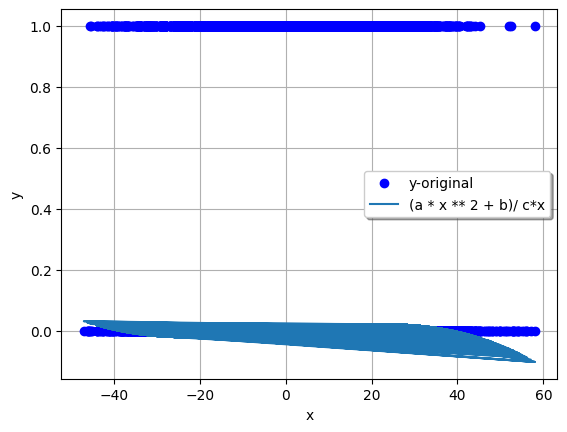

In [224]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [225]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

-0.30870177139199795

In [226]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

0.5556093694242367

In [227]:
Vars_Indep = df[["riesgo"]]
Var_Dep = df[["edad_cliente"]]
x = Vars_Indep
y = Var_Dep

In [228]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["riesgo"], df["edad_cliente"])
parametros

array([-7.06988837e-04,  2.04235366e+00,  3.32120720e+00])

In [229]:
parametros, _ = curve_fit(func1, df["riesgo"], df["edad_cliente"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,riesgo
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
22730,12.470510
22731,10.223838
22732,12.359134
22733,-9.557494


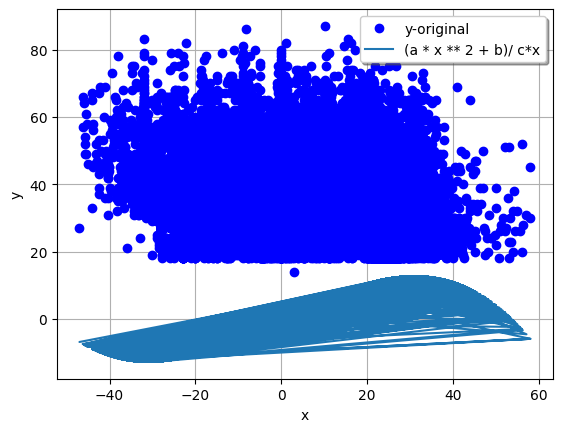

In [230]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [231]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

-8.320753113973254

In [232]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

2.8845715650635633

In [233]:
Vars_Indep = df[["riesgo"]]
Var_Dep = df[["descuento"]]
x = Vars_Indep
y = Var_Dep

In [234]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["riesgo"], df["descuento"])
parametros

array([-1.02199993e-02,  2.94390025e+01,  1.37793441e+01])

In [235]:
parametros, _ = curve_fit(func1, df["riesgo"], df["descuento"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,riesgo
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
22730,43.281803
22731,35.505469
22732,42.898348
22733,-33.193909


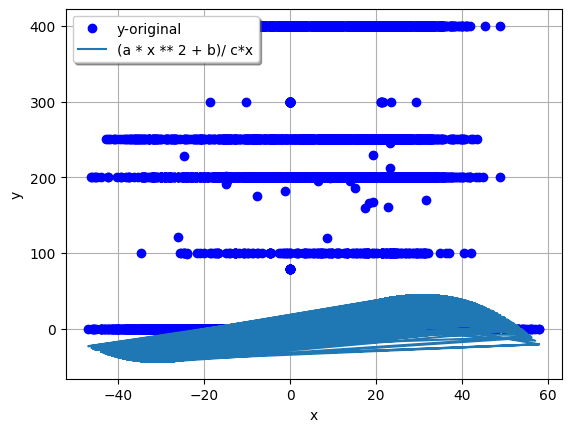

In [236]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [237]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

-0.29913148938533096

In [238]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

0.5469291447576468

In [239]:
Vars_Indep = df[["riesgo"]]
Var_Dep = df[["enganche"]]
x = Vars_Indep
y = Var_Dep

In [240]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["riesgo"], df["enganche"])
parametros

array([-6.85599950e-04,  4.92073669e+00,  2.17750082e-01])

In [241]:
parametros, _ = curve_fit(func1, df["riesgo"], df["enganche"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,riesgo
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
22730,554.419213
22731,407.767777
22732,542.644975
22733,-375.632790


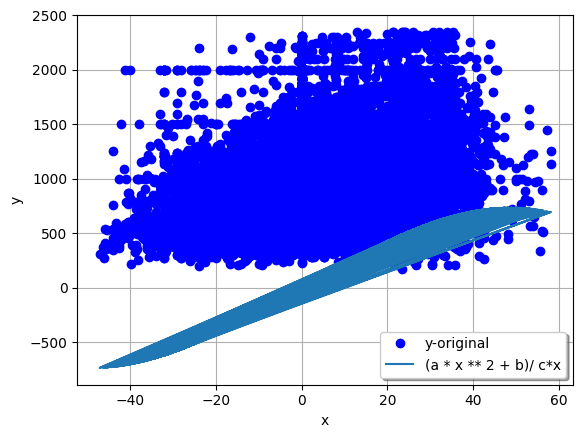

In [242]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [243]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

-4.888062281914695

In [244]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

2.2108962621332315

In [245]:
Vars_Indep = df[["riesgo"]]
Var_Dep = df[["monto_financiado"]]
x = Vars_Indep
y = Var_Dep

In [246]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["riesgo"], df["monto_financiado"])
parametros

array([-1.67932447e-02,  7.34076236e+01,  1.54344101e+00])

In [247]:
parametros, _ = curve_fit(func1, df["riesgo"], df["monto_financiado"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,riesgo
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
22730,1079.353206
22731,829.030700
22732,1061.563220
22733,-768.358170


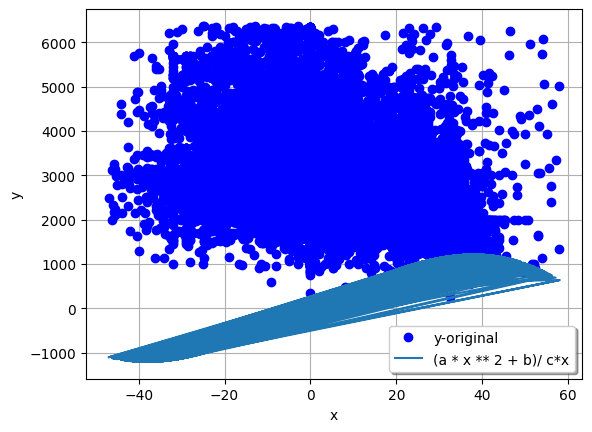

In [248]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [249]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

-8.399344519057225

In [250]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

2.898162265825919

#**1**

In [251]:
Vars_Indep = df[["score_buro"]]
Var_Dep = df[["inversion"]]
x = Vars_Indep
y = Var_Dep

In [252]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["score_buro"], df["inversion"])
parametros

array([-6.00643081e-08,  2.32224768e-01,  6.13042041e+02])

In [253]:
parametros, _ = curve_fit(func1, df["score_buro"], df["inversion"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,score_buro
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
22730,0.167553
22731,0.177766
22732,0.164398
22733,0.231324


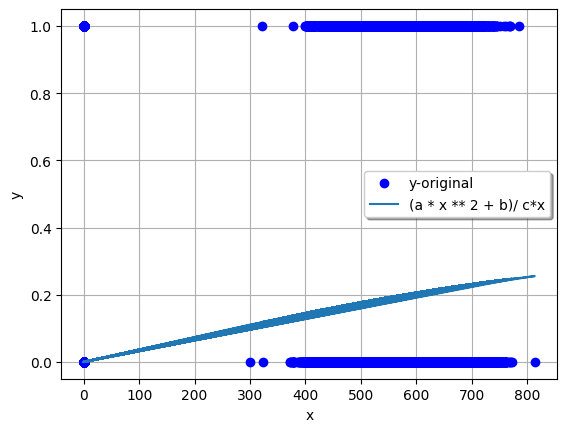

In [254]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [255]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

-0.20130054208601544

In [256]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

0.4486652895934958

In [257]:
Vars_Indep = df[["score_buro"]]
Var_Dep = df[["edad_cliente"]]
x = Vars_Indep
y = Var_Dep

In [258]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["score_buro"], df["edad_cliente"])
parametros

array([-1.35497689e-08,  1.55210923e-02,  1.67970339e-01])

In [259]:
parametros, _ = curve_fit(func1, df["score_buro"], df["edad_cliente"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,score_buro
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
22730,35.015557
22731,36.181752
22732,34.612562
22733,37.039650


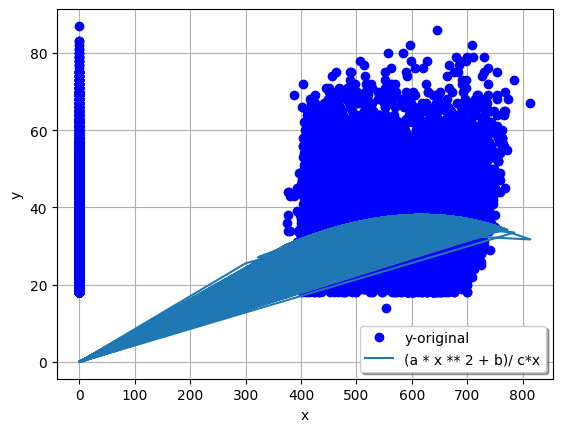

In [260]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [261]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

-3.8932918573623203

In [262]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

1.973142634824538

In [263]:
Vars_Indep = df[["score_buro"]]
Var_Dep = df[["descuento"]]
x = Vars_Indep
y = Var_Dep

In [264]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["score_buro"], df["descuento"])
parametros

array([-1.72217464e-06,  3.15870938e+00,  1.58274602e+01])

In [265]:
parametros, _ = curve_fit(func1, df["score_buro"], df["descuento"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,score_buro
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
22730,82.374064
22731,86.419846
22732,81.081163
22733,102.338588


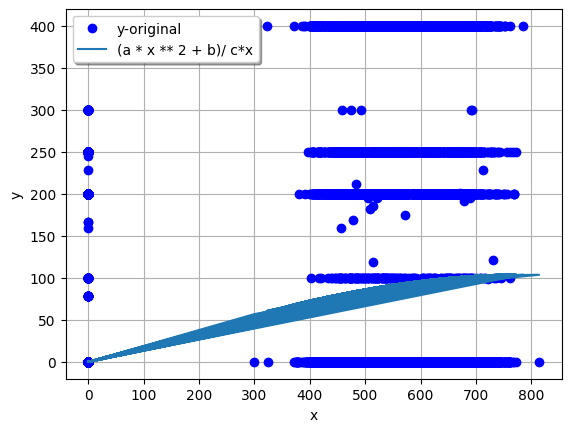

In [266]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [267]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

-0.10019904083724551

In [268]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

0.3165423207680855

In [269]:
Vars_Indep = df[["score_buro"]]
Var_Dep = df[["enganche"]]
x = Vars_Indep
y = Var_Dep

In [270]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["score_buro"], df["enganche"])
parametros

array([-8.51232169e-05,  6.17607514e+01,  1.99343924e+01])

In [271]:
parametros, _ = curve_fit(func1, df["score_buro"], df["enganche"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,score_buro
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
22730,1012.538304
22731,1015.094839
22732,1009.137870
22733,707.242740


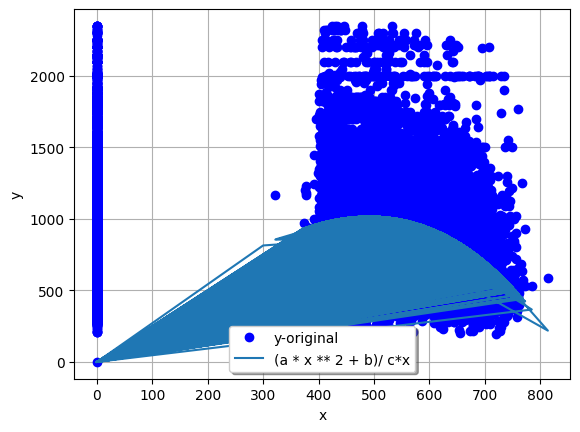

In [272]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [273]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

-2.4858491401707887

In [274]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

1.5766575849469626

In [275]:
Vars_Indep = df[["score_buro"]]
Var_Dep = df[["monto_financiado"]]
x = Vars_Indep
y = Var_Dep

In [276]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["score_buro"], df["monto_financiado"])
parametros

array([-1.46939385e-05,  2.18934960e+01,  3.06648007e+00])

In [277]:
parametros, _ = curve_fit(func1, df["score_buro"], df["monto_financiado"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,score_buro
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
22730,2854.151216
22731,2977.897553
22732,2813.705853
22733,3354.041711


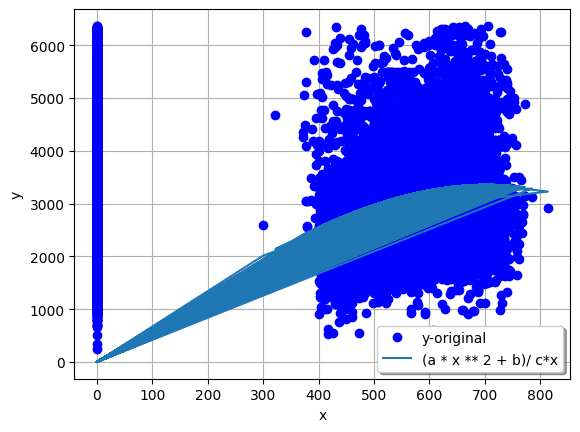

In [278]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [279]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

-4.096986879374338

In [280]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

2.0241014992767377

#**2**


In [281]:
Vars_Indep = df[["porc_eng"]]
Var_Dep = df[["inversion"]]
x = Vars_Indep
y = Var_Dep

In [282]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["porc_eng"], df["inversion"])
parametros

array([-1.32819399e-01,  1.96446503e+02,  1.13309170e+04])

In [283]:
parametros, _ = curve_fit(func1, df["porc_eng"], df["inversion"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,porc_eng
0,-0.057490
1,0.103970
2,0.250230
3,0.250230
4,0.250230
...,...
22730,0.145601
22731,0.210652
22732,0.254702
22733,0.222083


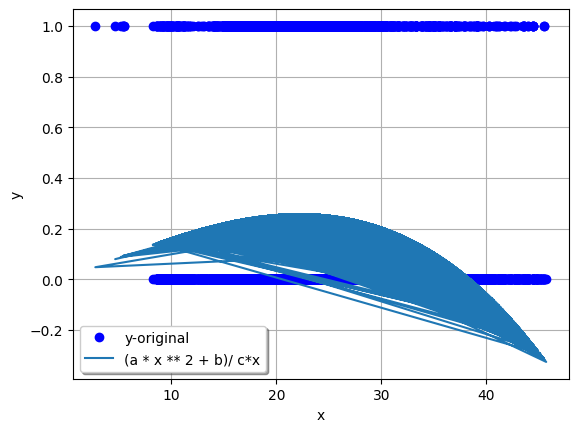

In [284]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [285]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

-0.0071101708421168475

In [286]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

0.08432182897753611

In [287]:
Vars_Indep = df[["porc_eng"]]
Var_Dep = df[["edad_cliente"]]
x = Vars_Indep
y = Var_Dep

In [288]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["porc_eng"], df["edad_cliente"])
parametros

array([-3.35605301e-03,  7.54521330e+00,  3.56320226e+00])

In [289]:
parametros, _ = curve_fit(func1, df["porc_eng"], df["edad_cliente"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,porc_eng
0,24.374059
1,33.717922
2,38.225308
3,38.225308
4,38.225308
...,...
22730,18.125262
22731,38.290860
22732,37.679068
22733,38.535532


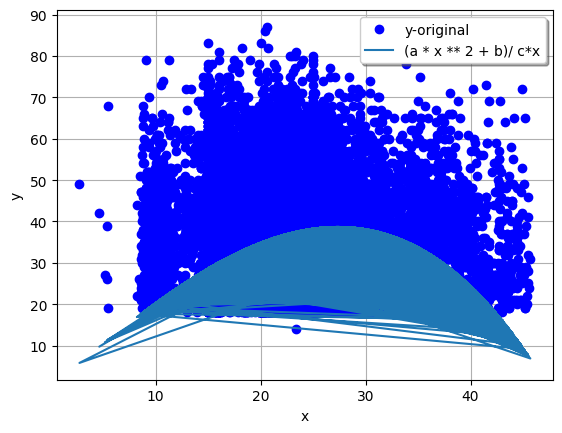

In [290]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [291]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

-0.20422031299954435

In [292]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

0.45190741640245774

In [293]:
Vars_Indep = df[["porc_eng"]]
Var_Dep = df[["descuento"]]
x = Vars_Indep
y = Var_Dep

In [294]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["porc_eng"], df["descuento"])
parametros

array([-3.96101553e-03,  7.48317244e+00,  1.48267917e+00])

In [295]:
parametros, _ = curve_fit(func1, df["porc_eng"], df["descuento"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,porc_eng
0,30.749147
1,62.057739
2,84.434299
3,84.434299
4,84.434299
...,...
22730,42.903070
22731,80.323147
22732,84.083894
22733,81.909170


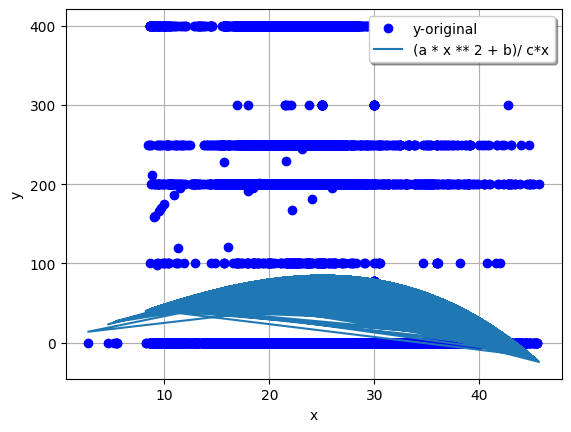

In [296]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [297]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

-0.007636055120051388

In [298]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

0.0873845244883291

In [299]:
Vars_Indep = df[["porc_eng"]]
Var_Dep = df[["enganche"]]
x = Vars_Indep
y = Var_Dep

In [300]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["porc_eng"], df["enganche"])
parametros

array([-6.50827955e+00,  6.18462820e+04,  1.46628734e+03])

In [301]:
parametros, _ = curve_fit(func1, df["porc_eng"], df["enganche"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,porc_eng
0,1403.499266
1,1286.212154
2,985.455937
3,985.455937
4,985.455937
...,...
22730,371.028659
22731,1130.019795
22732,942.632032
22733,1101.227054


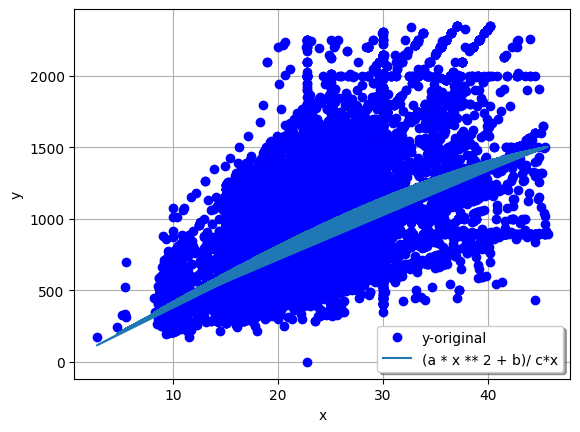

In [302]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [303]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

0.30663721099332597

In [304]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

0.5537483282081545

In [305]:
Vars_Indep = df[["porc_eng"]]
Var_Dep = df[["monto_financiado"]]
x = Vars_Indep
y = Var_Dep

In [306]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["porc_eng"], df["monto_financiado"])
parametros

array([-5.34086676e+01,  1.07128501e+05,  5.62459984e+02])

In [307]:
parametros, _ = curve_fit(func1, df["porc_eng"], df["monto_financiado"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,porc_eng
0,1536.105876
1,2593.444703
2,3278.049314
3,3278.049314
4,3278.049314
...,...
22730,1623.151580
22731,3181.534857
22732,3251.752478
22733,3227.609167


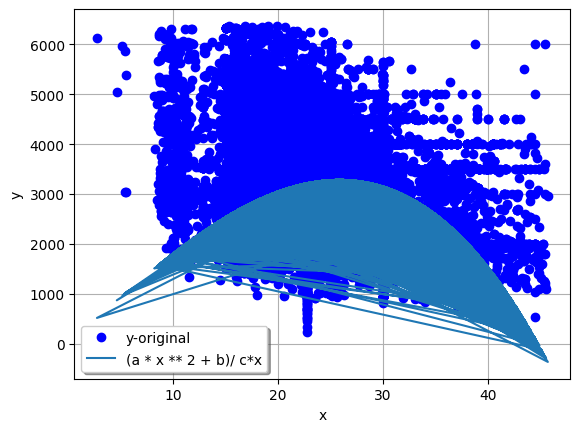

In [308]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [309]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

-0.27053240807057044

In [310]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

0.5201272998704937

#**3**

In [311]:
Vars_Indep = df[["limite_credito"]]
Var_Dep = df[["inversion"]]
x = Vars_Indep
y = Var_Dep

In [312]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["limite_credito"], df["inversion"])
parametros

array([-3.98002377e-10,  1.28438810e-01,  2.73534879e+03])

In [313]:
parametros, _ = curve_fit(func1, df["limite_credito"], df["inversion"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,limite_credito
0,0.216588
1,0.250302
2,0.000000
3,0.278779
4,0.278779
...,...
22730,0.324049
22731,0.216588
22732,0.207443
22733,0.278779


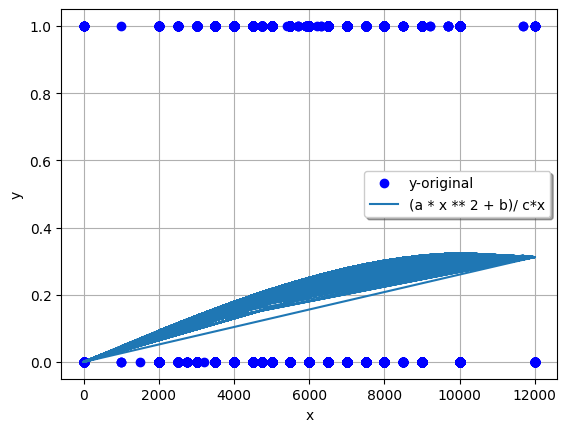

In [314]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [315]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

0.01666283054728135

In [316]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

0.12908458679207735

In [317]:
Vars_Indep = df[["limite_credito"]]
Var_Dep = df[["edad_cliente"]]
x = Vars_Indep
y = Var_Dep

In [318]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["limite_credito"], df["edad_cliente"])
parametros

array([-2.32889233e-10,  3.95491104e-02,  4.79891947e+00])

In [319]:
parametros, _ = curve_fit(func1, df["limite_credito"], df["edad_cliente"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,limite_credito
0,35.140077
1,38.965144
2,0.000000
3,41.043149
4,41.043149
...,...
22730,33.883017
22731,35.140077
22732,33.944954
22733,41.043149


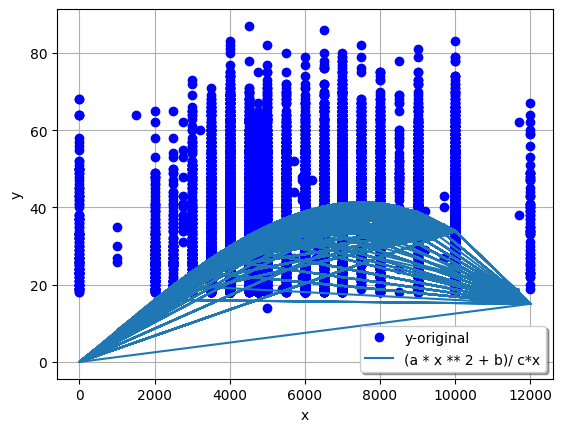

In [320]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [321]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

-0.11920053728457458

In [322]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

0.34525430813325786

In [323]:
Vars_Indep = df[["limite_credito"]]
Var_Dep = df[["descuento"]]
x = Vars_Indep
y = Var_Dep

In [324]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["limite_credito"], df["descuento"])
parametros

array([-9.59373254e-10,  1.14259555e-01,  5.23630357e+00])

In [325]:
parametros, _ = curve_fit(func1, df["limite_credito"], df["descuento"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,limite_credito
0,86.201289
1,91.349308
2,0.000000
3,89.901560
4,89.901560
...,...
22730,34.990770
22731,86.201289
22732,84.012519
22733,89.901560


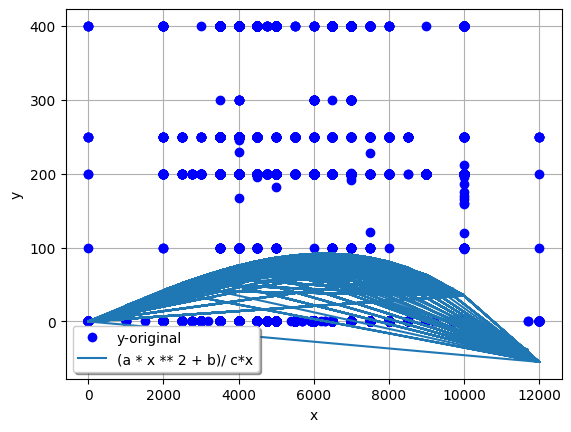

In [326]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [327]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

-0.0019038719432060702

In [328]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

0.04363338106548781

In [329]:
Vars_Indep = df[["limite_credito"]]
Var_Dep = df[["enganche"]]
x = Vars_Indep
y = Var_Dep

In [330]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["limite_credito"], df["enganche"])
parametros

array([-7.02776592e-08,  8.82266914e+00,  3.67254225e+01])

In [331]:
parametros, _ = curve_fit(func1, df["limite_credito"], df["enganche"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,limite_credito
0,961.966831
1,1028.062794
2,0.000000
3,1025.269263
4,1025.269263
...,...
22730,488.735892
22731,961.966831
22732,936.024355
22733,1025.269263


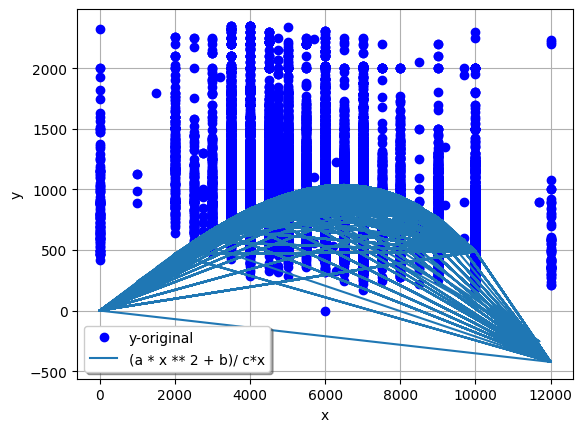

In [332]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [333]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

-0.1827204349710827

In [334]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

0.4274581090248291

In [335]:
Vars_Indep = df[["limite_credito"]]
Var_Dep = df[["monto_financiado"]]
x = Vars_Indep
y = Var_Dep

In [336]:
def func1 (x, a, b, c):
  return (a * x ** 2 + b)/ c*x

parametros, covs = curve_fit(func1, df["limite_credito"], df["monto_financiado"])
parametros

array([-5.50749499e-07,  1.02564723e+02,  1.49796982e+02])

In [337]:
parametros, _ = curve_fit(func1, df["limite_credito"], df["monto_financiado"])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a * x ** 2 + b)/ c*x
yfit1

,limite_credito
0,2963.877647
1,3313.994971
2,0.000000
3,3531.753274
4,3531.753274
...,...
22730,3170.275687
22731,2963.877647
22732,2858.252356
22733,3531.753274


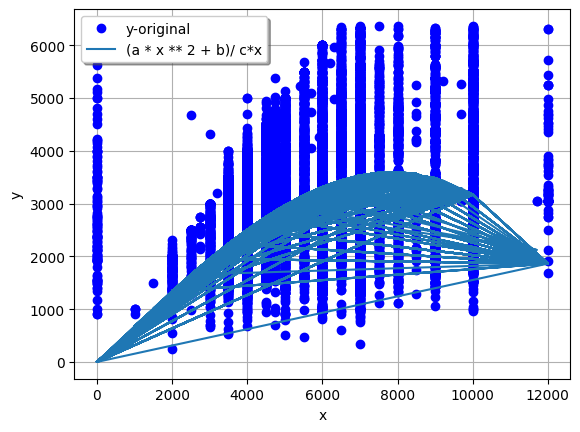

In [338]:
plt.plot(x, y, "bo", label = "y-original")
plt.plot(x, yfit1, label = "(a * x ** 2 + b)/ c*x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "best", fancybox= True, shadow = True)
plt.grid(True)
plt.show()

In [339]:
R2_m1_1 = r2_score(y, yfit1)
R2_m1_1

-0.10210048324769438

In [340]:
corr_m1_1 = np.sqrt(abs(R2_m1_1))
corr_m1_1

0.3195316623555393